In [9]:
from environment import GridWorld
from agent import Agent
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import axes
import seaborn as sns

env = GridWorld()
agent = Agent(env)

In [10]:
arr = agent.value_iteration()
print(arr, max(arr))


Value iteration converged after 22 iterations
[3.10866558 3.70149798 4.30587432 5.13727884 5.24550221 3.6401609
 4.21487345 4.87788587 5.89598861 6.30865203 3.06550252 3.48643571
 0.         6.75271588 7.60493592 2.56814181 2.8854946  0.
 8.05937407 9.18974927 2.13798389 2.14451682 6.17210931 9.18974927
 0.        ] 9.189749267204155


In [11]:
arr1 = optimal_policy = agent.get_optimal_policy()
arr1

Value iteration converged after 22 iterations


{(0, 0): (0, 1),
 (0, 1): (1, 0),
 (0, 2): (0, 1),
 (0, 3): (1, 0),
 (0, 4): (1, 0),
 (1, 0): (0, 1),
 (1, 1): (0, 1),
 (1, 2): (0, 1),
 (1, 3): (1, 0),
 (1, 4): (1, 0),
 (2, 0): (0, 1),
 (2, 1): (-1, 0),
 (2, 2): (-1, 0),
 (2, 3): (1, 0),
 (2, 4): (1, 0),
 (3, 0): (-1, 0),
 (3, 1): (-1, 0),
 (3, 2): (-1, 0),
 (3, 3): (0, 1),
 (3, 4): (1, 0),
 (4, 0): (-1, 0),
 (4, 1): (-1, 0),
 (4, 2): (0, 1),
 (4, 3): (0, 1)}

In [12]:
path = agent.get_trajectory(optimal_policy)
print(path)
print(agent.get_return(path))

[(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (2, 3), (3, 3), (3, 3), (3, 4), (3, 4), (4, 4)]
10


In [13]:
expected_gain_matrix = []
for trial in range(300):
    expected_gain_matrix.append(agent.get_average_gain_per_episode(policy=optimal_policy))

expected_gain_per_trial = np.mean(expected_gain_matrix, axis=0)
std_per_trial = np.std(expected_gain_matrix, axis=0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


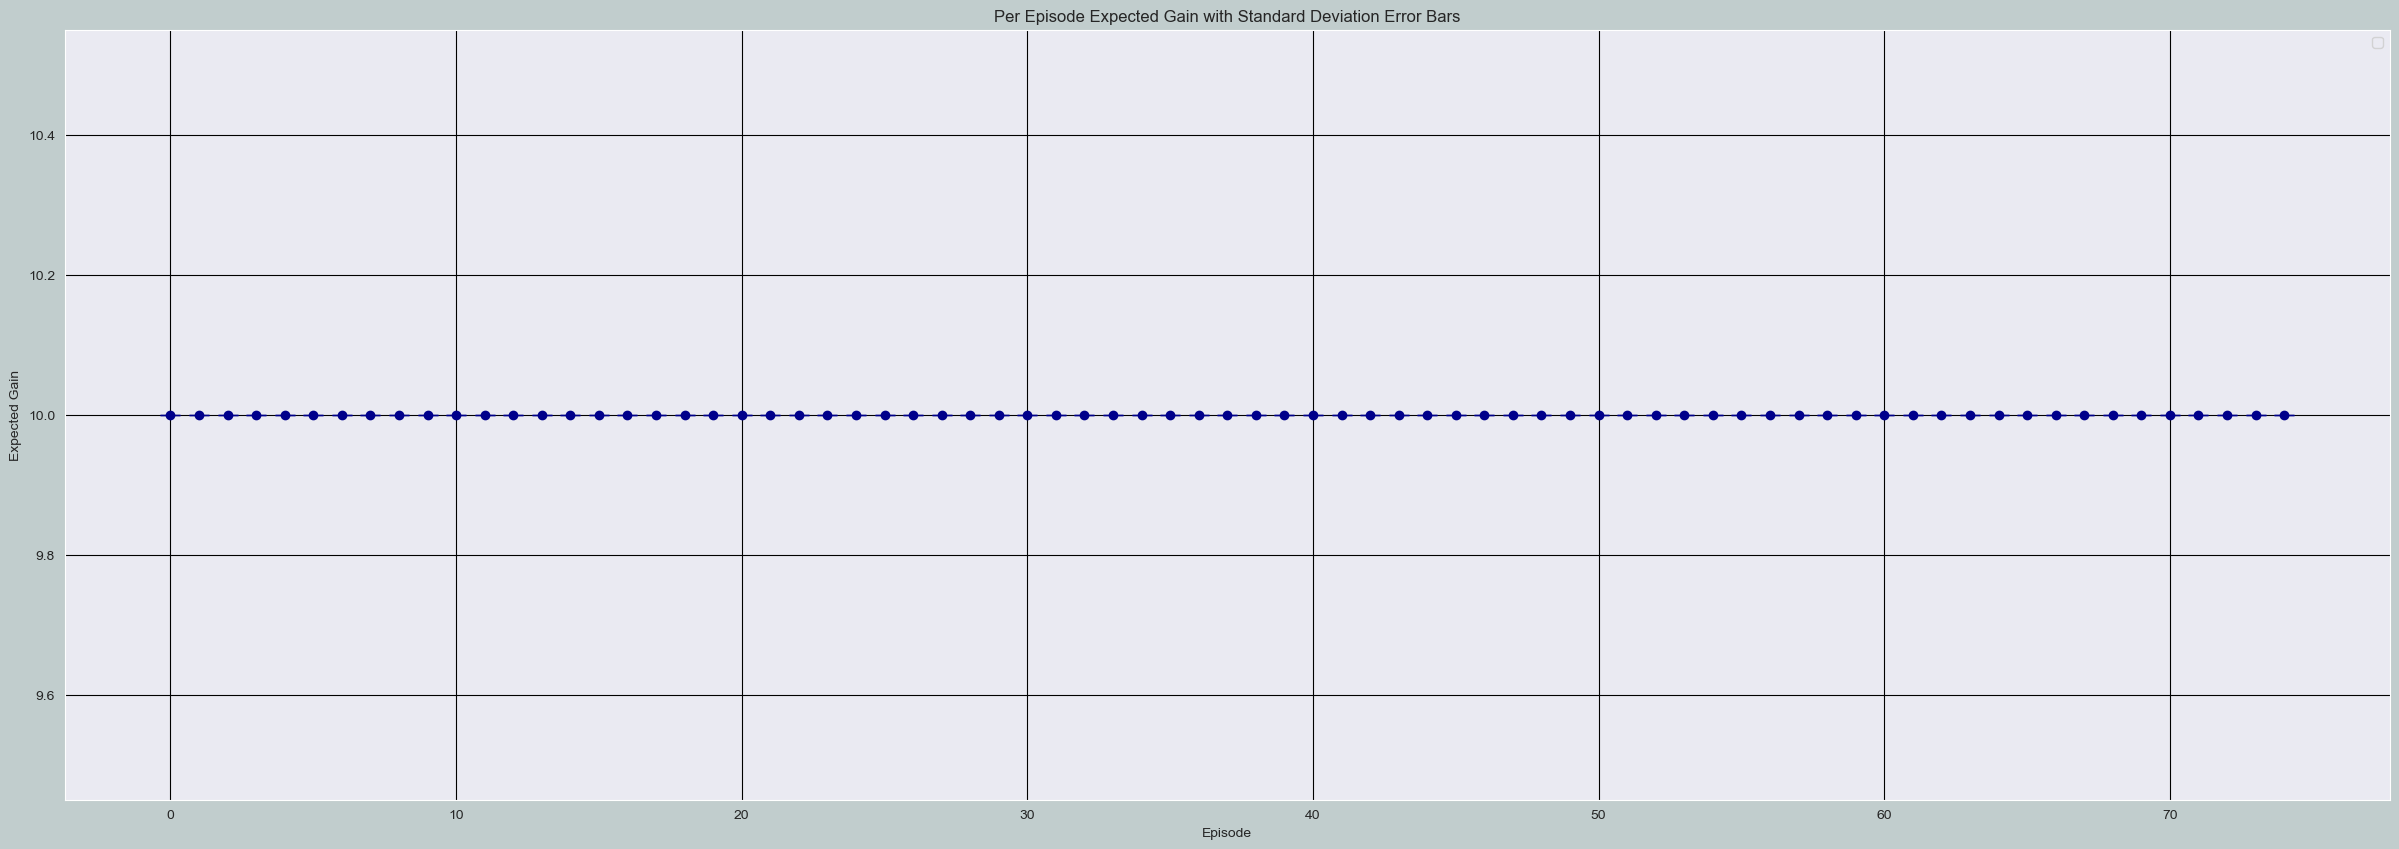

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(30, 10),  facecolor= "#C1CDCD")
plt.errorbar(range(0, len(expected_gain_per_trial)), expected_gain_per_trial, yerr=std_per_trial, fmt="o", capsize=7, color = 'darkblue')
plt.xlabel("Episode")
plt.ylabel("Expected Gain")
plt.title("Per Episode Expected Gain with Standard Deviation Error Bars")
plt.legend()
plt.grid(color='black')
plt.show()

In [15]:
expected_gain_per_trial_value_iteration = expected_gain_per_trial
agent = Agent(env, sigma=0.5)
ms_deviation_per_trial, ms_deviation_per_episode = agent.grad_desc()

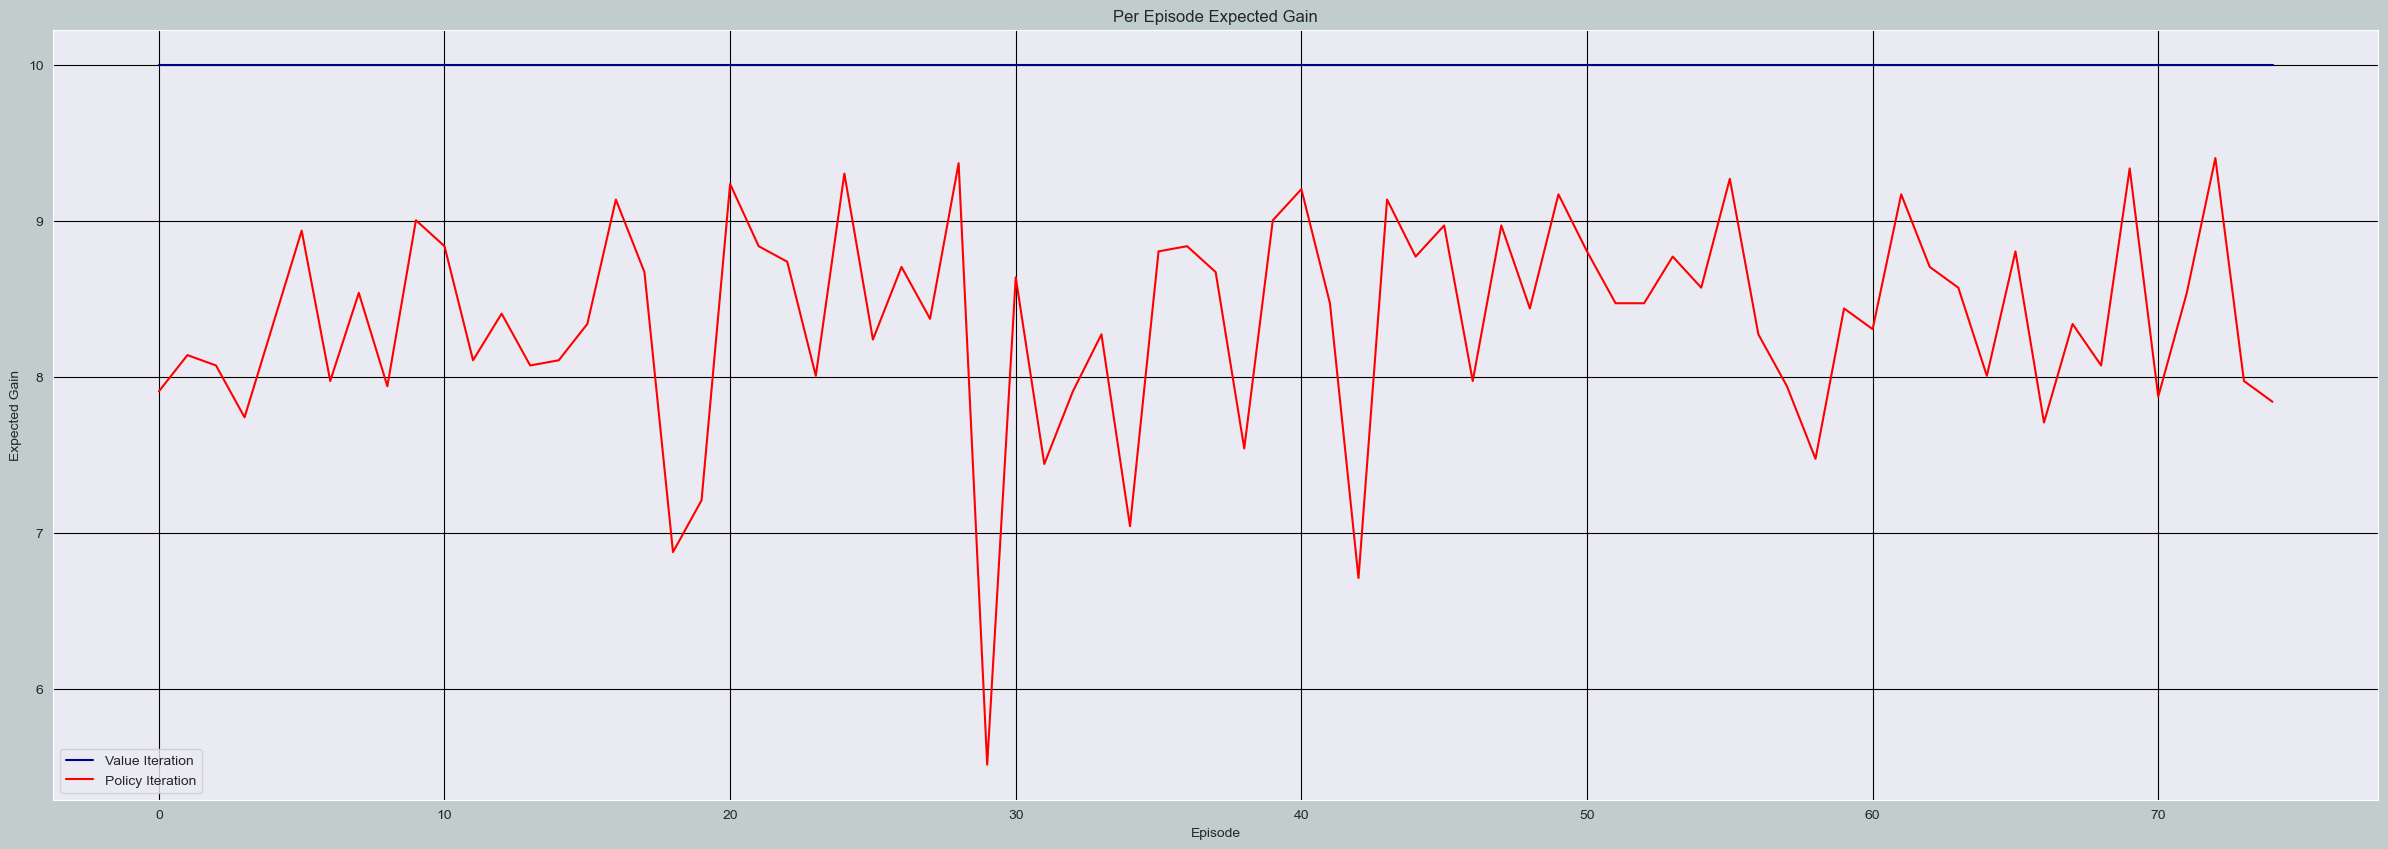

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(30, 10),  facecolor= "#C1CDCD")
plt.plot(range(0, len(expected_gain_per_trial)), expected_gain_per_trial, label="Value Iteration", color = 'darkblue')
plt.plot(ms_deviation_per_episode[0], label="Policy Iteration", color = 'red')
plt.plot
plt.xlabel("Episode")
plt.ylabel("Expected Gain")
plt.title("Per Episode Expected Gain")
plt.legend()
plt.grid(color='black')
plt.show()